In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, colors
ur = 0.999991
u0 = 1.26 * 10 ** -6
cu = 1.68 * 10 ** -8
cu_annel = 1.72 * 10 ** -8
pi = np.pi


In [40]:
def skin_depth(f, sigma):
    return (u0 * ur * f * pi / sigma )**-0.5 # in meters
    
def area_eff(depth, D): # Rac - TED - ML equation by  David Knight 
    r = D/2
    depth_p = depth*(1 - np.exp(-r/depth))
    z = 0.62006 * r / depth
    y = 0.189774/(1 + 0.272481 * (z ** 1.82938 - z ** -0.99457) ** 2) ** 1.0941
    eff_area = pi*(2*r*depth_p - depth_p ** 2 )*(1+y)
    
    return eff_area

In [41]:
# Frequency range (logarithmic)
freq = np.logspace(0, 9, 300)  # 1 Hz to 1 GHz

# Wire diameters in mm(taken from catalogue plus 0.01, 0.02 and 3.0)
diameters = np.array([
    0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
    0.1, 0.1, 0.11, 0.11, 0.12, 0.12, 0.13, 0.13,
    0.14, 0.14, 0.15, 0.15, 0.16, 0.16, 0.17, 0.17,
    0.18, 0.18, 0.19, 0.19, 0.2, 0.21, 0.22, 0.23,
    0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.32,
    0.35, 0.37, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65,
    0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1,
    1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.0, 2.3,
    2.6, 2.9, 3.0
])

# remove duplicated
diameters = np.unique(diameters, return_index=False)

# comment this line if use real diameters
diameters = np.logspace(-2, np.log10(3), 300)  # 0.01 mm to 3 mm

In [42]:
#area_eff(skin_depth(10**6,cu_annel), 1/1000) 

In [43]:
#(1/2000)**2 * pi

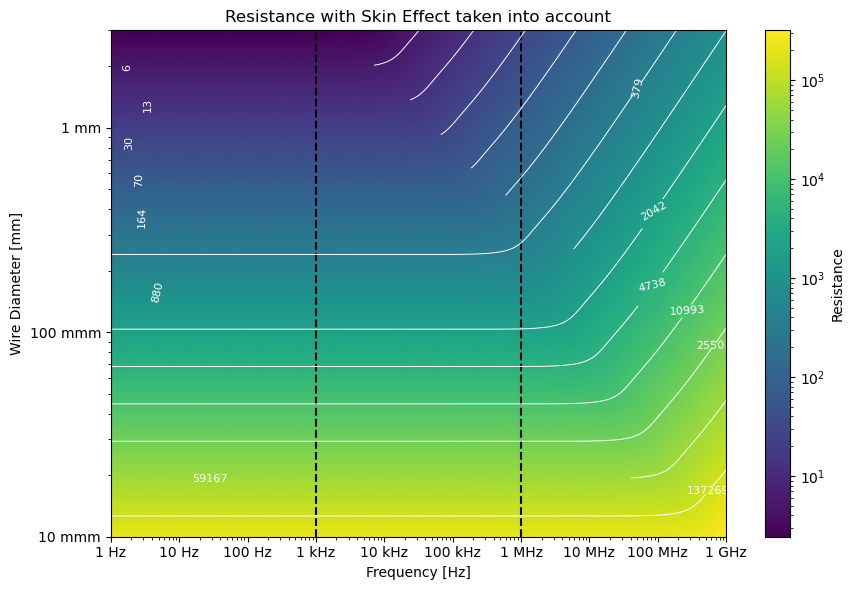

In [66]:
# Meshgrid
F, D = np.meshgrid(freq, diameters)

# Cross-section area is (pi*(diameters/2000)**2)
# effective area area is area_eff(skin_depth(F, cu_annel), D/1000)
# Calculate the average resistance per 1000 meters
R_per_length = 1000 * cu_annel / area_eff(skin_depth(F, cu_annel), D/1000)

# Plot
plt.figure(figsize=(9, 6))

# Color map
c = plt.pcolormesh(F, D, R_per_length,
                   norm=colors.LogNorm(vmin=R_per_length.min(),
                                       vmax=R_per_length.max()),
                   shading='gouraud',
                   cmap='viridis')
plt.colorbar(c, label='Resistance')

# Frequency Line
plt.axvline(x=10**3, linestyle='dashed', color='black', label='1 Khz')
plt.axvline(x=10**6, linestyle='dashed', color='black', label='1 Mhz')

# Contours
levels = np.logspace(np.log10(R_per_length.min()),
                     np.log10(R_per_length.max()), 15)
#contours = plt.contour(F, D, R_per_length,locator=ticker.LogLocator(subs=(1,3)), colors='white', linewidths=0.7)
contours = plt.contour(F, D, R_per_length,levels=levels, colors='white', linewidths=0.7)
plt.clabel(contours, inline=True, fontsize=8)

# Log scales
plt.xscale('log')
plt.yscale('log')

plt.gca().xaxis.set_major_formatter(ticker.EngFormatter(unit='Hz'))
plt.gca().yaxis.set_major_formatter(ticker.EngFormatter(unit='mm'))

plt.xlabel('Frequency [Hz]')
plt.ylabel('Wire Diameter [mm]')
plt.title('Resistance with Skin Effect taken into account')
plt.tight_layout()
plt.show()

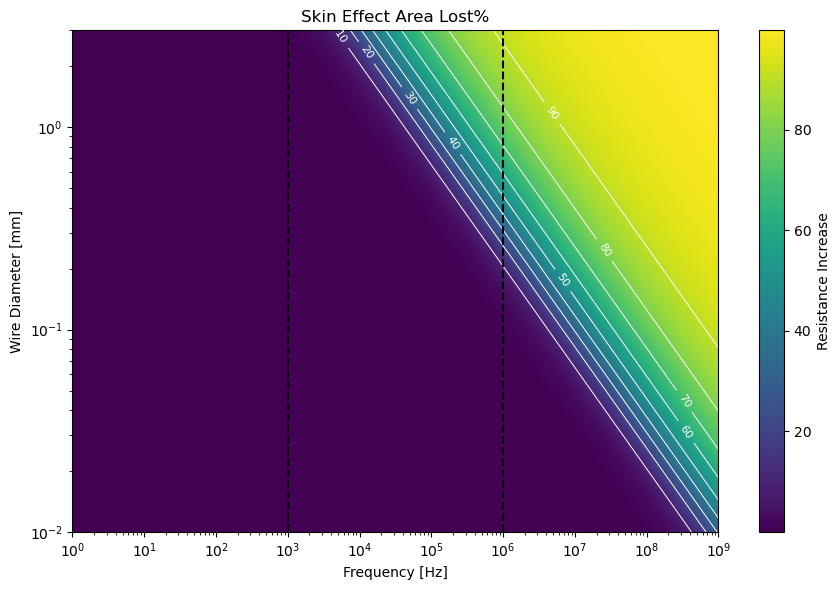

In [45]:
# Meshgrid
F, D = np.meshgrid(freq, diameters)

# Cross-section area is (pi*(D/2000)**2)
# effective area area is area_eff(skin_depth(F, cu_annel), D/1000)
R_increase_percent = (1 - area_eff(skin_depth(F, cu_annel), D/1000)/(pi*(D/2000)**2)) * 100

# Plot
plt.figure(figsize=(9, 6))

# Color map
c = plt.pcolormesh(F, D, R_increase_percent, shading='gouraud', cmap='viridis')
plt.colorbar(c, label='Resistance Increase')

# Log scales
plt.xscale('log')
plt.yscale('log')

# Contours
contours = plt.contour(F, D, R_increase_percent, colors='white',levels=[i for i in range(10,100,10)], linewidths=0.7)
plt.clabel(contours, inline=True, fontsize=8)

# Frequency Line
plt.axvline(x=10**3, linestyle='dashed', color='black', label='1K')
plt.axvline(x=10**6, linestyle='dashed', color='black', label='1M')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Wire Diameter [mm]')
plt.title('Skin Effect Area Lost%')
plt.tight_layout()
plt.show()


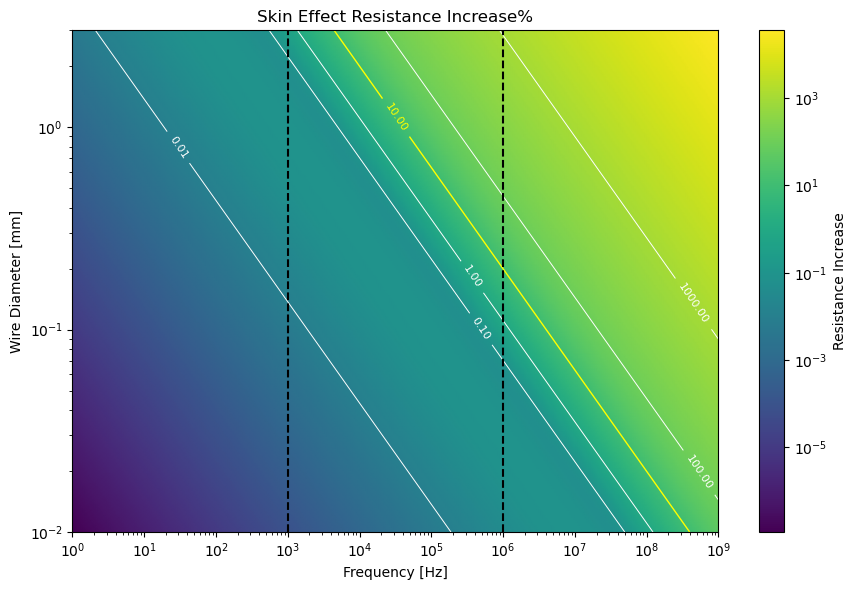

In [23]:
# Meshgrid
F, D = np.meshgrid(freq, diameters)

# Cross-section area is (pi*(D/2000)**2)
# effective area area is area_eff(skin_depth(F, cu_annel), D/1000)
R_increase_percent = (((pi*(D/2000)**2))/area_eff(skin_depth(F, cu_annel), D/1000)-1) * 100

# Plot
plt.figure(figsize=(9, 6))

# Color map
c = plt.pcolormesh(F,
                   D,
                   R_increase_percent,
                   norm=colors.LogNorm(vmin=R_increase_percent.min(),
                                       vmax=R_increase_percent.max()),
                   shading='gouraud',
                   cmap='viridis')
plt.colorbar(c, label='Resistance Increase')

# Log scales
plt.xscale('log')
plt.yscale('log')

# Contours
contours = plt.contour(F,
                       D,
                       R_increase_percent,
                       levels=[1e-2,1e-1,1e0,1e2,1e3],
                       colors='white',
                       linewidths=0.7)
plt.clabel(contours, inline=True, fontsize=8,fmt='%1.2f')
contours = plt.contour(F,
                       D,
                       R_increase_percent,
                       levels=[1e1],
                       colors='yellow',
                       linewidths=1)
plt.clabel(contours, inline=True, fontsize=8,fmt='%1.2f')

# Frequency Line
plt.axvline(x=10**3, linestyle='dashed', color='black', label='1K')
plt.axvline(x=10**6, linestyle='dashed', color='black', label='1M')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Wire Diameter [mm]')
plt.title('Skin Effect Resistance Increase%')
plt.tight_layout()
plt.show()
